### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, precision_recall_curve, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
data = fetch_ucirepo(id=563) 


In [32]:
X = data.data.features
y = data.data.targets['Churn']
y_df = data.data.targets

In [58]:
X.columns = ['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value']

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 320.1 KB


In [60]:
y.value_counts(normalize = True)

Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64

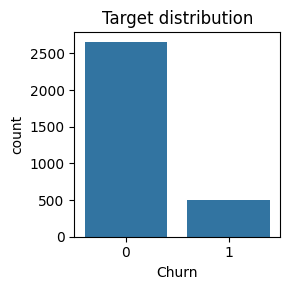

In [34]:
f, ax = plt.subplots(figsize=(3,3))
sns.countplot(data = y_df, x = 'Churn', ax=ax)
plt.title('Target distribution')
plt.tight_layout()
plt.show()

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]).fit(x_train, y_train)

y_test_preds = pipeline.predict(x_test)
print(classification_report(y_test_preds, y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       724
           1       0.48      0.92      0.63        64

    accuracy                           0.91       788
   macro avg       0.73      0.92      0.79       788
weighted avg       0.95      0.91      0.92       788



              precision    recall  f1-score   support

           0       0.93      0.96      0.95       648
           1       0.77      0.69      0.73       140

    accuracy                           0.91       788
   macro avg       0.85      0.82      0.84       788
weighted avg       0.91      0.91      0.91       788



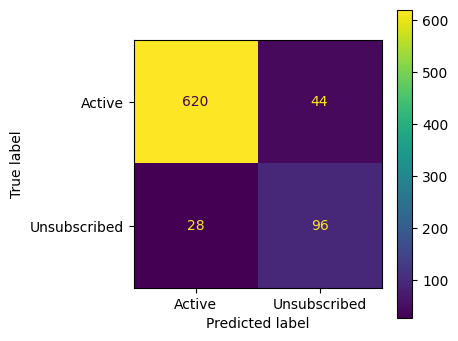

In [152]:
def get_confusion_matrix(threshold):
    y_pred_probas = pipeline.predict_proba(x_test)
    y_preds = np.where(y_pred_probas[:, 1] > threshold, 1, 0)
    return y_preds, confusion_matrix(y_test, y_preds, labels = [0, 1])

preds, cm = get_confusion_matrix(0.3)
print(classification_report(preds, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Active', 'Unsubscribed'])

f, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
# plt.tight_layout()
plt.show()